In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/workspaces/k-means-project-tutorial-omass/housing.csv')

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
# Select the features for clustering
features_for_clustering = data[['Latitude', 'Longitude', 'MedInc']]

# Initialize KMeans with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)

# Fit the model on the features data
kmeans.fit(features_for_clustering)

# Assign clusters to the data
data['cluster'] = kmeans.labels_

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
# Define features for the clustering
features = data[['Latitude', 'Longitude', 'MedInc']]

# Splitting the dataset into training and testing sets
X_train, X_test = train_test_split(features, test_size=0.2, random_state=42)

In [6]:
# Initialize KMeans with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)

# Fit the model on the training data
kmeans.fit(X_train)

# Predict clusters for the training data
X_train['cluster'] = kmeans.predict(X_train)


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
# Predict clusters for the test data
X_test['cluster'] = kmeans.predict(X_test)

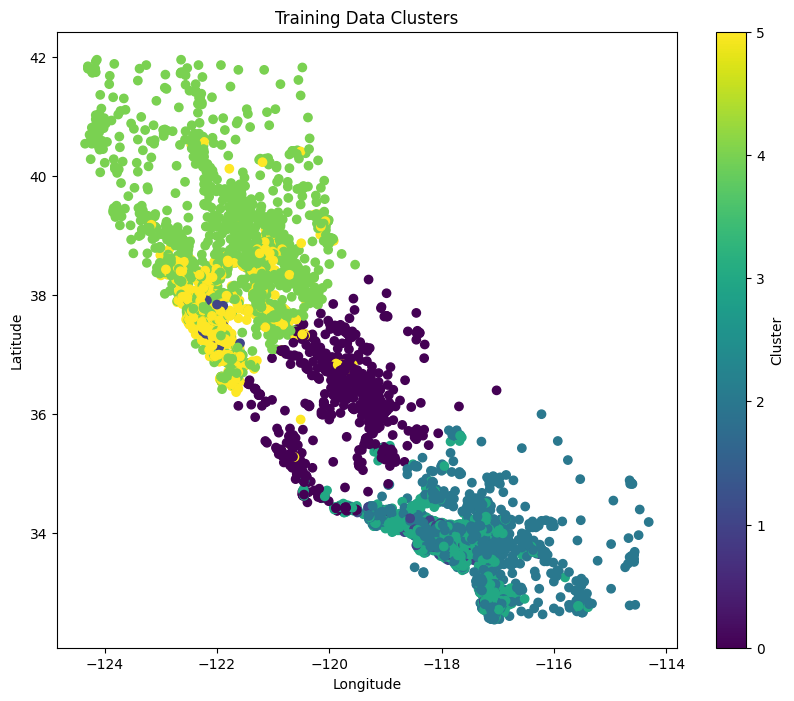

In [8]:
# Scatter plot for training data
plt.figure(figsize=(10, 8))
plt.scatter(X_train['Longitude'], X_train['Latitude'], c=X_train['cluster'], cmap='viridis', marker='o')
plt.title('Training Data Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

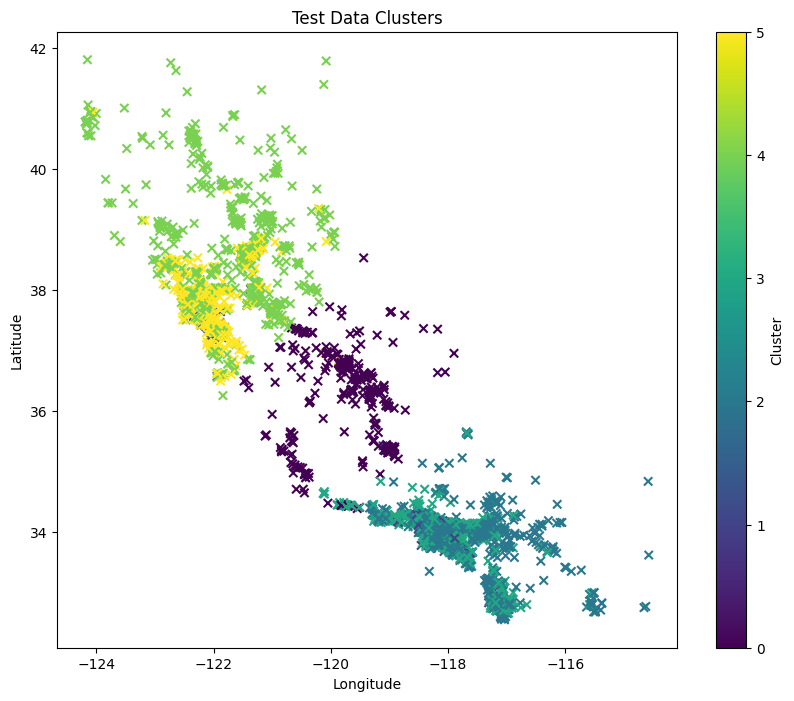

In [9]:
# Scatter plot for test data
plt.figure(figsize=(10, 8))
plt.scatter(X_test['Longitude'], X_test['Latitude'], c=X_test['cluster'], cmap='viridis', marker='x')
plt.title('Test Data Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model using the training data
rf_model.fit(X_train[['Latitude', 'Longitude', 'MedInc']], X_train['cluster'])

RandomForestClassifier(random_state=42)

In [11]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test[['Latitude', 'Longitude', 'MedInc']])

# Evaluate the model with classification report
print(classification_report(X_test['cluster'], rf_predictions))

# Calculate and print the accuracy of the model
accuracy = accuracy_score(X_test['cluster'], rf_predictions)
print(f"Accuracy: {accuracy}")

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       338
           1       1.00      0.97      0.98        89
           2       1.00      1.00      1.00      1488
           3       1.00      0.99      0.99       736
           4       0.99      1.00      1.00       957
           5       0.99      0.99      0.99       520

    accuracy                           1.00      4128
   macro avg       1.00      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128

Accuracy: 0.9953972868217055


In [13]:
import pickle

# Path where you want to save the model
model_path = '/workspaces/k-means-project-tutorial-omass/random_forest_model.pkl'

# Open a file in write-binary mode
file = open(model_path, 'wb')

# Save the RandomForest model using pickle.dump
pickle.dump(rf_model, file)

print(f"Model saved at {model_path}")

Model saved at /workspaces/k-means-project-tutorial-omass/random_forest_model.pkl


In [14]:
import pickle

# Define the path where you want to save the K-Means model
kmeans_model_path = '/workspaces/k-means-project-tutorial-omass/kmeans_model.pkl'  # Ensure this path is where you want to save your model

# Open a file in write-binary mode
file = open(kmeans_model_path, 'wb')

# Save the K-Means model using pickle.dump
pickle.dump(kmeans, file)

# Close the file
file.close()

print(f"K-Means model saved at {kmeans_model_path}")

K-Means model saved at /workspaces/k-means-project-tutorial-omass/kmeans_model.pkl
